In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats 
sns.set(style="darkgrid")


%matplotlib inline


<h1>Users Clustering</h1>

In [2]:
session_data = pd.read_csv("all_data_session_breakdown_zscore_3.csv")
session_data=session_data.rename(columns = {'product':'product_type'})
users = pd.read_csv("user_data_sample.csv")

In [6]:
import datetime
#Compute the hour of the day and the day of the week for sessions

session_data['hour'] =  session_data['start_timestamp'].apply(lambda x: datetime.datetime.fromtimestamp(x).hour)
session_data['weekday'] = session_data['start_timestamp'].apply(lambda x: datetime.datetime.fromtimestamp(x).isoweekday())

session_data.head()

,Unnamed: 0,ms_played,context,track_id,product_type,end_timestamp,user_id,gender,age_range,country,acct_age_weeks,start_timestamp,start_date,end_date,session_id,hour,weekday
0,0,330962,album,2ab4f3b3a6c34fbaba95c2451b65efbd,open,1.444790e+09,a9abbb14c8544898a0e06feb94f8051e,male,18 - 24,US,35,1.444790e+09,2015-10-14 04:30:32.968000,2015-10-14 04:36:03.930000,0,4,3
1,1,7476,album,0f5f2acbcf244490948ac2e63adade73,open,1.444790e+09,a9abbb14c8544898a0e06feb94f8051e,male,18 - 24,US,35,1.444790e+09,2015-10-14 04:28:48.504000,2015-10-14 04:28:55.980000,0,4,3
2,2,227280,collection,0f4a2173eb1f4aa9b8693ad7a92fab73,open,1.444797e+09,a9abbb14c8544898a0e06feb94f8051e,male,18 - 24,US,35,1.444797e+09,2015-10-14 06:25:39.150000,2015-10-14 06:29:26.430000,0,6,3
3,3,325,playlist,affc7467b68e4dfab9d1d7b9ec8d4673,open,1.444796e+09,a9abbb14c8544898a0e06feb94f8051e,male,18 - 24,US,35,1.444796e+09,2015-10-14 06:18:22.425000,2015-10-14 06:18:22.750000,0,6,3
4,4,204196,collection,427fd37cbfe640a8a78179477c9f33d3,open,1.444799e+09,a9abbb14c8544898a0e06feb94f8051e,male,18 - 24,US,35,1.444799e+09,2015-10-14 07:04:45.854000,2015-10-14 07:08:10.050000,0,7,3


In [14]:
session_cl = session_data.groupby(['user_id', 'hour', 'weekday'], as_index=False).agg({
        "track_id" : pd.Series.nunique, #Number of differents tracks
        "ms_played" : "sum", #Time spent on a session
    })

session_cl

,user_id,hour,weekday,ms_played,track_id
0,000eb8799c9344c8853e8a2b57d835ff,6,7,320466,1
1,000eb8799c9344c8853e8a2b57d835ff,8,5,2188915,9
2,000eb8799c9344c8853e8a2b57d835ff,9,5,3482737,15
3,000eb8799c9344c8853e8a2b57d835ff,10,5,3355642,12
4,000eb8799c9344c8853e8a2b57d835ff,11,5,3352268,13
5,000eb8799c9344c8853e8a2b57d835ff,12,5,3424723,14
6,000eb8799c9344c8853e8a2b57d835ff,13,5,1344715,5
7,001b9229782940c39f311c3d5fa3bdc9,14,6,73736,2
8,001b9229782940c39f311c3d5fa3bdc9,18,2,95385,9
9,001b9229782940c39f311c3d5fa3bdc9,18,4,1532,1


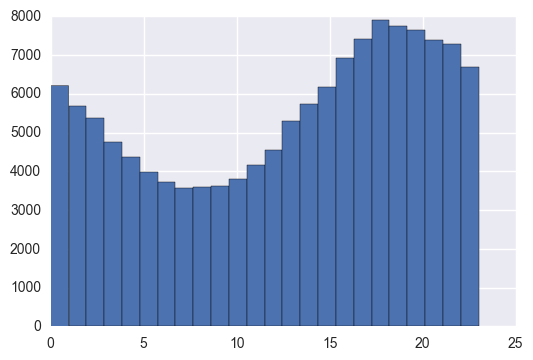

In [15]:
session_cl.hour.hist(bins=24)